# TP 2

## Objectifs
1.  Tracer des graphiques en utilisant
    [matplotlib](https://matplotlib.org/api/pyplot_api.html)
2.  Lecture et tracé d'histogrammes d'images.
3.  Travailler avec les algorithmes de [regroupement](http://scikit-learn.org/stable/modules/clustering.html)
    et [classification](http://scikit-learn.org/stable/modules/svm.html)

## Exercise 1 \[★\]

[matplotlib](https://matplotlib.org/stable/api/pyplot_summary.html) peut être utilisé pour tracer des graphiques. Vous trouverez ci-dessous un code très simple avec seulement des valeurs x. Après avoir importé la bibliothèque *matplotlib*, nous initialisons les valeurs de x et nous traçons le graphique.



In [ ]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot.plot(x)
plot.show()

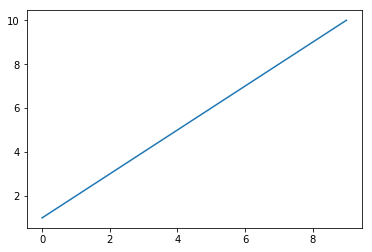



Modifions maintenant la couleur, le style et la largeur de la ligne.

In [ ]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot.plot(x, linewidth=3, drawstyle="steps", color="#00363a")
plot.show()

Nous allons maintenant initialiser les valeurs y et tracer le graphique.

In [ ]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [0, 1, 0, 0, 1, 0, 1, 1, 1, 0]
plot.plot(x, y, linewidth=3, drawstyle="steps", color="#00363a")
plot.show()

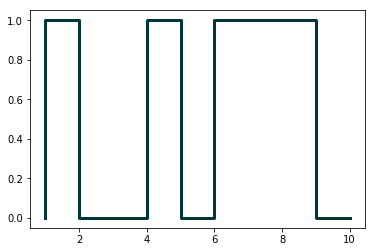



Lors de la [première séance pratique](../TP1/tp1.ipynb), nous avons vu comment analyser les fichiers JSON. En continuant avec le même fichier [JSON](../../data/pl.json), nous allons maintenant représenter graphiquement  les résultats
du nombre de langages de programmation publiés par an. Vérifiez le résultat.

In [ ]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open("../../data/pl.json"))
dataframe = json_normalize(data)
grouped = dataframe.groupby("year").count()
plot.plot(grouped)
plot.show()

Le programme suivant ajoutera le titre et les étiquettes à l'axe des x et à l'axe des y.

In [ ]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open("../../data/pl.json"))
dataframe = json_normalize(data)
grouped = dataframe.groupby("year").count()
plot.plot(grouped)
plot.title("Programming languages per year")
plot.xlabel("year", fontsize=16)
plot.ylabel("count", fontsize=16)
plot.show()

Il existe encore une autre façon de tracer les 'dataframes', en utilisant
[pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html).



In [ ]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open("../../data/pl.json"))
dataframe = json_normalize(data)
grouped = dataframe.groupby("year").count()
grouped = grouped.rename(columns={"languageLabel": "count"}).reset_index()
grouped.plot(x=0, kind="bar", title="Programming languages per year")

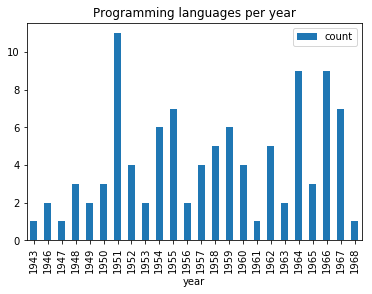

Maintenant, nous voulons créer plusieurs sous-images. Une méthode simple est donnée ci-dessous.
Rappelons que lors de la [première séance pratique](../TP1/tp1.ipynb), nous avons regroupé par
sur plusieurs colonnes. Des sous-parcelles peuvent être utilisées pour visualiser ces données.



In [ ]:
!pip install pandas --upgrade

In [ ]:
from pandas import json_normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot

jsondata = json.load(open("../../data/plparadigm.json"))
array = []
for data in jsondata:
    array.append([data["year"], data["languageLabel"], data["paradigmLabel"]])
dataframe = pd.DataFrame(array, columns=["year", "languageLabel", "paradigmLabel"])
dataframe = dataframe.astype(
    dtype={"year": "int64", "languageLabel": "<U200", "paradigmLabel": "<U200"}
)
grouped = dataframe.groupby(["paradigmLabel", "year"]).count()
grouped = grouped.rename(columns={"languageLabel": "count"})
grouped = grouped.groupby(["paradigmLabel"])
# Initialization of subplots
nr = math.ceil(grouped.ngroups / 2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(20, 25))
# Creation of subplots
for i, group in enumerate(grouped.groups.keys()):
    g = grouped.get_group(group).reset_index()
    g.plot(
        x="year", y="count", kind="bar", title=group, ax=axes[math.floor(i / 2), i % 2]
    )
plot.show()

**Question 1**  

Modifiez le code ci-dessus afin d'obtenir une représentation visuelle du nombre de langages de programmation, selon différents paradigmes, publiés chaque année. Autrement dit, pour chaque année disponible, affichez le nombre de langages de programmation appartenant à chaque paradigme.

**Question 2**  

Détecter les années de pic de création de langages :  
- Identifiez les 5 années ayant le plus grand nombre de nouveaux langages de programmation.  
- Représentez ces années sur un graphique en mettant en évidence les barres correspondantes.

## Exercice 2 \[★\]

Dans cet exercice, nous allons travailler sur les images. Téléchargez une image (par ex,
[image.bmp](../../images/picture.bmp) et [flower.jpg](../../images/flower.jpg)) dans votre dossier et ouvrez-la de la manière suivante. Nous allons d'abord essayer de d'obtenir quelques métadonnées de l'image.

In [ ]:
import os, sys
from PIL import Image

imgfile = Image.open("../../images/picture.bmp")
print(imgfile.size, imgfile.format)

Nous utilisons le module 'Image' de Python PIL
([Documentation](http://www.effbot.org/imagingbook/image.htm)). Nous allons essayez maintenant d'obtenir des données de 100 pixels à partir d'une image.

In [ ]:
import os, sys
from PIL import Image

imgfile = Image.open("../../images/flower.jpg")
data = imgfile.getdata()
for i in range(10):
    for j in range(10):
        print(i, j, data.getpixel((i, j)))

Vous pouvez remarquer la position et les valeurs des pixels (un tuple de 3 valeurs). Essayons d'obtenir des métadonnées supplémentaires sur les images, c'est-à-dire le mode de l'image (par exemple, RGB)), le nombre de bandes, le nombre de bits pour chaque bande, la largeur et la hauteur de l'image (en pixels).


In [ ]:
import os, sys
from PIL import Image

imgfile = Image.open("../../images/flower.jpg")
print(imgfile.mode, imgfile.getbands(), imgfile.bits, imgfile.width, imgfile.height)

Nous pouvons également obtenir des informations supplémentaires sur les images, comme les informations EXIF (Exchangeable image file format). Dans certains cas, les informations EXIF des images sont supprimées (car elles peuvent contenir des informations privées).

In [ ]:
import os, sys
from PIL import Image
from PIL.ExifTags import TAGS

imgfile = Image.open("../../images/flower.jpg")
exif_data = imgfile._getexif()

if exif_data:  # s'il existe des informations EXIF
    for tag, value in exif_data.items():
        if tag in TAGS:
            print(TAGS[tag], value)

Obtenons maintenant un histogramme des couleurs. Lorsque vous exécutez le code suivant, vous obtenez un tableau unique de valeurs, la fréquence de chaque bande (R, G, B etc.) concaténée ensemble. Dans le code suivant, nous supposerons que nous travaillons avec une image de 3 bandes (mode RGB) et que chaque bande est représentée par 8 bits. Nous allons tracer le [histogramme](http://www.effbot.org/imagingbook/image.htm#tag-Image.Image.histogram) de différentes couleurs.



In [ ]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
# we have three bands (for this image)
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
fig, (axis1, axis2, axis3) = plot.subplots(nrows=3, ncols=1)
axis1.plot(red, color="red")
axis2.plot(green, color="green")
axis3.plot(blue, color="blue")
plot.show()

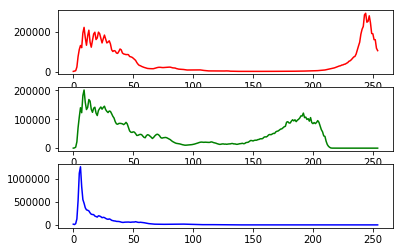

Mais si vous souhaitez les voir tous dans une seule image.



In [ ]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
x = range(255)
y = []
for i in x:
    y.append((red[i], green[i], blue[i]))
plot.plot(x, y)
plot.show()

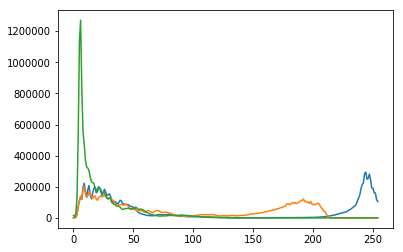

Mais nous ne voulons pas perdre les couleurs de la bande.



In [ ]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
x = range(255)
y = []
for i in x:
    y.append((red[i], green[i], blue[i]))
figure, axes = plot.subplots()
axes.set_prop_cycle("color", ["red", "green", "blue"])
plot.plot(x, y)
plot.show()

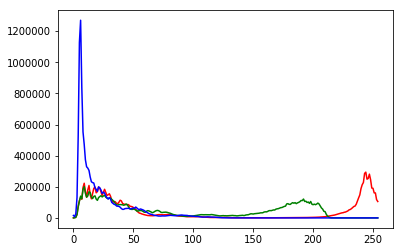

Visualisons la distribution spatiale des intensités de couleur à l'aide d'une carte thermique.

In [ ]:
!pip install opencv-python seaborn

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger l'image
image = cv2.imread("../../images/flower.jpg")  # Remplacez par le chemin de votre image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR à RGB

# Séparer les canaux
red_channel, green_channel, blue_channel = cv2.split(image)

# Tracer les cartes thermiques
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(red_channel, cmap="Reds", ax=axes[0])
axes[0].set_title("Canal Rouge")

sns.heatmap(green_channel, cmap="Greens", ax=axes[1])
axes[1].set_title("Canal Vert")

sns.heatmap(blue_channel, cmap="Blues", ax=axes[2])
axes[2].set_title("Canal Bleu")

plt.show()


**Question 1**

Votre prochaine tâche consiste à obtenir les 20 plus grandes intensités dans chaque bande (R, G, B) et à créer un graphique unique de ces intensités maximales. Écrivez un programme Python qui peut réaliser cela.

**Question 2**

#### Normalisation et égalisation de l'histogramme

Modifiez le programme de visualisation de l'histogramme pour appliquer une égalisation d'histogramme sur l'image avant de tracer l'histogramme. Comparez les histogrammes originaux et égalisés dans un sous-graphe.

**Astuce** : Utilisez `cv2.equalizeHist()` de OpenCV pour les images en niveaux de gris ou implémentez votre propre normalisation pour les images RGB.

## Exercice 3 \[★★\]

Dans cet exercice, nous examinerons  [Algorithme de regroupement KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
En continuant avec les images, nous allons maintenant trouver 4 couleurs prédominantes dans une image.


In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
clusters = KMeans(n_clusters=4, n_init=2)
clusters.fit(numarray)
npbins = numpy.arange(0, 5)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)
barlist = plot.bar(labels, histogram[0])
for i in range(4):
    barlist[i].set_color(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )
plot.show()

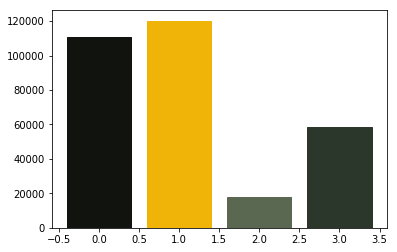

**Question 1**

Pour votre prochaine question, votre objectif est de comprendre le code ci-dessus et
réaliser ce qui suit :
1.  Supposer que le nombre de grappes est donné par l'utilisateur, généraliser
    le code ci-dessus.
2.  En cas de diagramme à barres, assurez-vous que les barres sont disposées dans le
    ordre décroissant de la fréquence des couleurs.
3.  Ajoutez également le support pour le graphique circulaire en plus du graphique en barres. Assurez-vous que
    que nous utilisons les couleurs de l'image comme les couleurs de la tranche. 
4.  Avez-vous des observations intéressantes ?

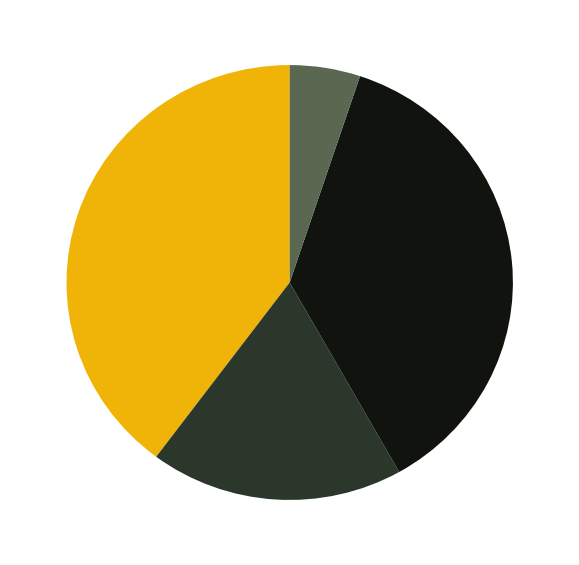



**Question 2**

Votre prochaine tâche consiste à configurer l'algorithme KMeans de différentes manières :

1. **Impact de l'initialisation des clusters :** L'algorithme `KMeans` utilise `n_init=2` dans le code donné. Comment le changement de la valeur de `n_init` affecte-t-il les résultats du regroupement ? Essayez différentes valeurs et discutez de vos observations.  

2. **Représentations alternatives des couleurs :** Le code utilise les valeurs RGB pour représenter les couleurs. Modifiez l'implémentation pour afficher les couleurs en utilisant un autre espace colorimétrique (par exemple, HSV ou LAB). Comment les résultats se comparent-ils à ceux obtenus avec RGB ?

## Exercise 4 \[★★\]

Nous allons essayer d'obtenir plus de clusters et de vérifier le temps pris par chacun de ces algorithmes.
Commençons par quelques exercices très simples pour expérimenter l'algorithme KMeans. Considérez les données suivantes et visualisez-les sur un nuage de points à l'aide d'un diagramme de dispersion.

In [ ]:
import numpy as np
import matplotlib.pyplot as plot

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

plot.scatter(numarray[:, 0], numarray[:, 1])
plot.show()

Visuellement, il est assez évident qu'il y a deux groupes. Mais utilisons l'algorithme KMeans pour obtenir les 2 clusters. Nous allons d'abord voir les étiquettes de nos données regroupées.

In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

clusters = KMeans(n_clusters=2, n_init=2)
clusters.fit(numarray)
print(clusters.labels_)

Maintenant, nous allons visualiser les groupes à l'aide d'un nuage de points. Nous utiliserons
deux couleurs pour les distinguer visuellement.

In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

clusters = KMeans(n_clusters=2, n_init=2)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00"])

plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()

Et si nous essayions d'obtenir 4 clusters ? Essayez d'exécuter le code suivant, plusieurs fois. Des observations ? Essayez de changer la valeur de *n_init* avec des valeurs plus élevées.

In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

clusters = KMeans(n_clusters=4, n_init=2)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])

plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()

Nous allons maintenant essayer d'obtenir des clusters avec des données réelles (référence : [citypopulation.json](../../data/citypopulation.json), Source : Wikidata). Il contient des informations concernant différentes villes du monde : nom de la ville, année de sa fondation et sa population en l'année 2010. Dans le code suivant, nous voulons regrouper les données sur la population et d'observer s'il y a une corrélation entre l'âge et la les statistiques de la population (2010). Dans le code suivant, il y a un ligne commentée. Vous pouvez le décommenter pour essayer avec une population différente les chiffres. Des observations ? Pourquoi avons-nous utilisé LabelEncoder ? Quelle est sa but ?

In [ ]:
from pandas import json_normalize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import json

data = json.load(open("../../data/citypopulation.json"))
dataframe = json_normalize(data)
le = LabelEncoder()
dataframe["cityLabel"] = le.fit_transform(dataframe["cityLabel"])
dataframe = dataframe.astype(
    dtype={"year": "<i4", "cityLabel": "<U200", "population": "i"}
)
dataframe = dataframe.loc[dataframe["year"] > 1500]
# dataframe = dataframe.loc[dataframe['population'] < 700000]
yearPopulation = dataframe[["year", "population"]]
clusters = KMeans(n_clusters=2, n_init=1000)
clusters.fit(yearPopulation.values)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])

plot.rcParams["figure.figsize"] = [10, 10]
plot.scatter(
    yearPopulation["year"], yearPopulation["population"], c=colors[clusters.labels_]
)
plot.show()

Maintenant, continuons à travailler avec [flower.jpg](../../images/flower.jpg). Recommençons avec **KMeans** et essayons d'obtenir des groupes de taille comprise entre 2 et 11.

In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=5, ncols=2, figsize=(20, 25))
xaxis = 0
yaxis = 0
for x in range(2, 12):
    cluster_count = x

    clusters = KMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if yaxis == 0:
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]),
                math.ceil(clusters.cluster_centers_[i][2]),
            )
        )
plot.show()

Votre prochain objectif est de tester le code ci-dessus pour les tailles de grappes entre 2 et 21, ce qui vous donnera le chiffre indiqué ci-dessous.

**Note:** L'image suivante a été générée après 6 minutes. 

En option, vous pouvez ajouter des déclarations *print* pour tester si votre code fonctionne bien.

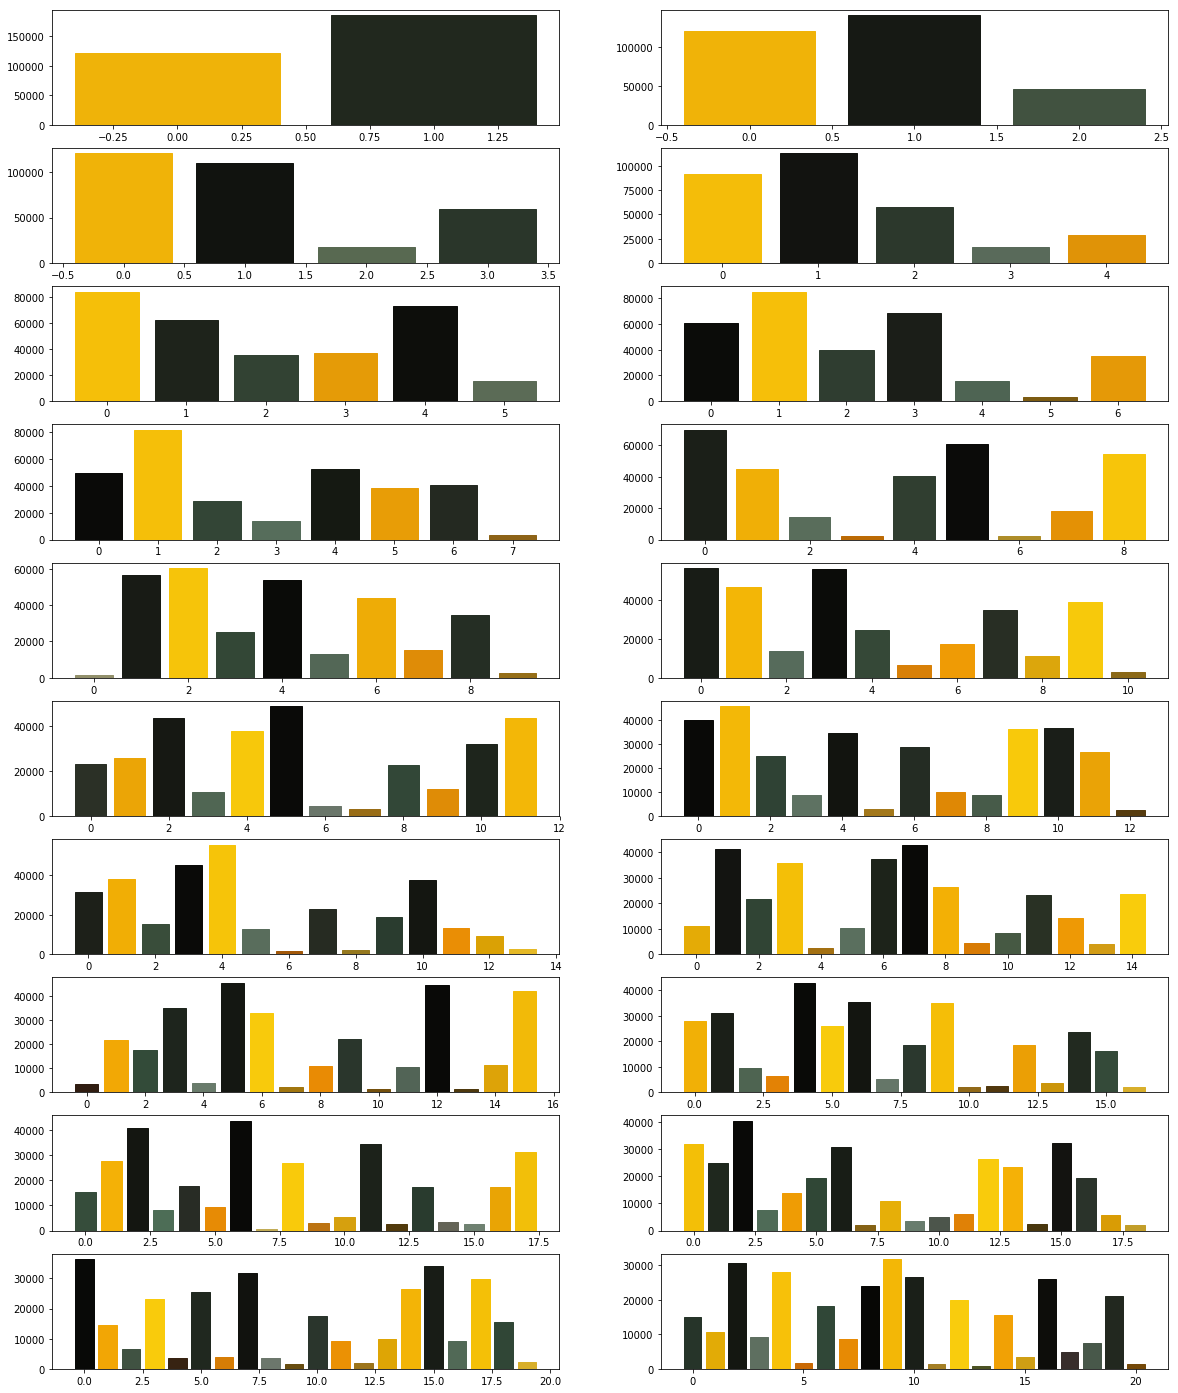

Maintenant, nous modifions l'algorithme ci-dessus pour utiliser l'algorithme de clustering **MiniBatchKMeans**.
(voir [ici](http://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans)).
Observez les changements.



In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=5, ncols=2, figsize=(20, 25))
xaxis = 0
yaxis = 0
for x in range(2, 12):
    cluster_count = x

    clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if yaxis == 0:
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]),
                math.ceil(clusters.cluster_centers_[i][2]),
            )
        )
plot.show()

Qu'avez-vous observé ? Votre prochain objectif est de tester le code ci-dessus pour des tailles de grappes comprises entre 2 et 21, ce qui vous donnera la figure ci-dessous.

Quelles sont vos conclusions ?

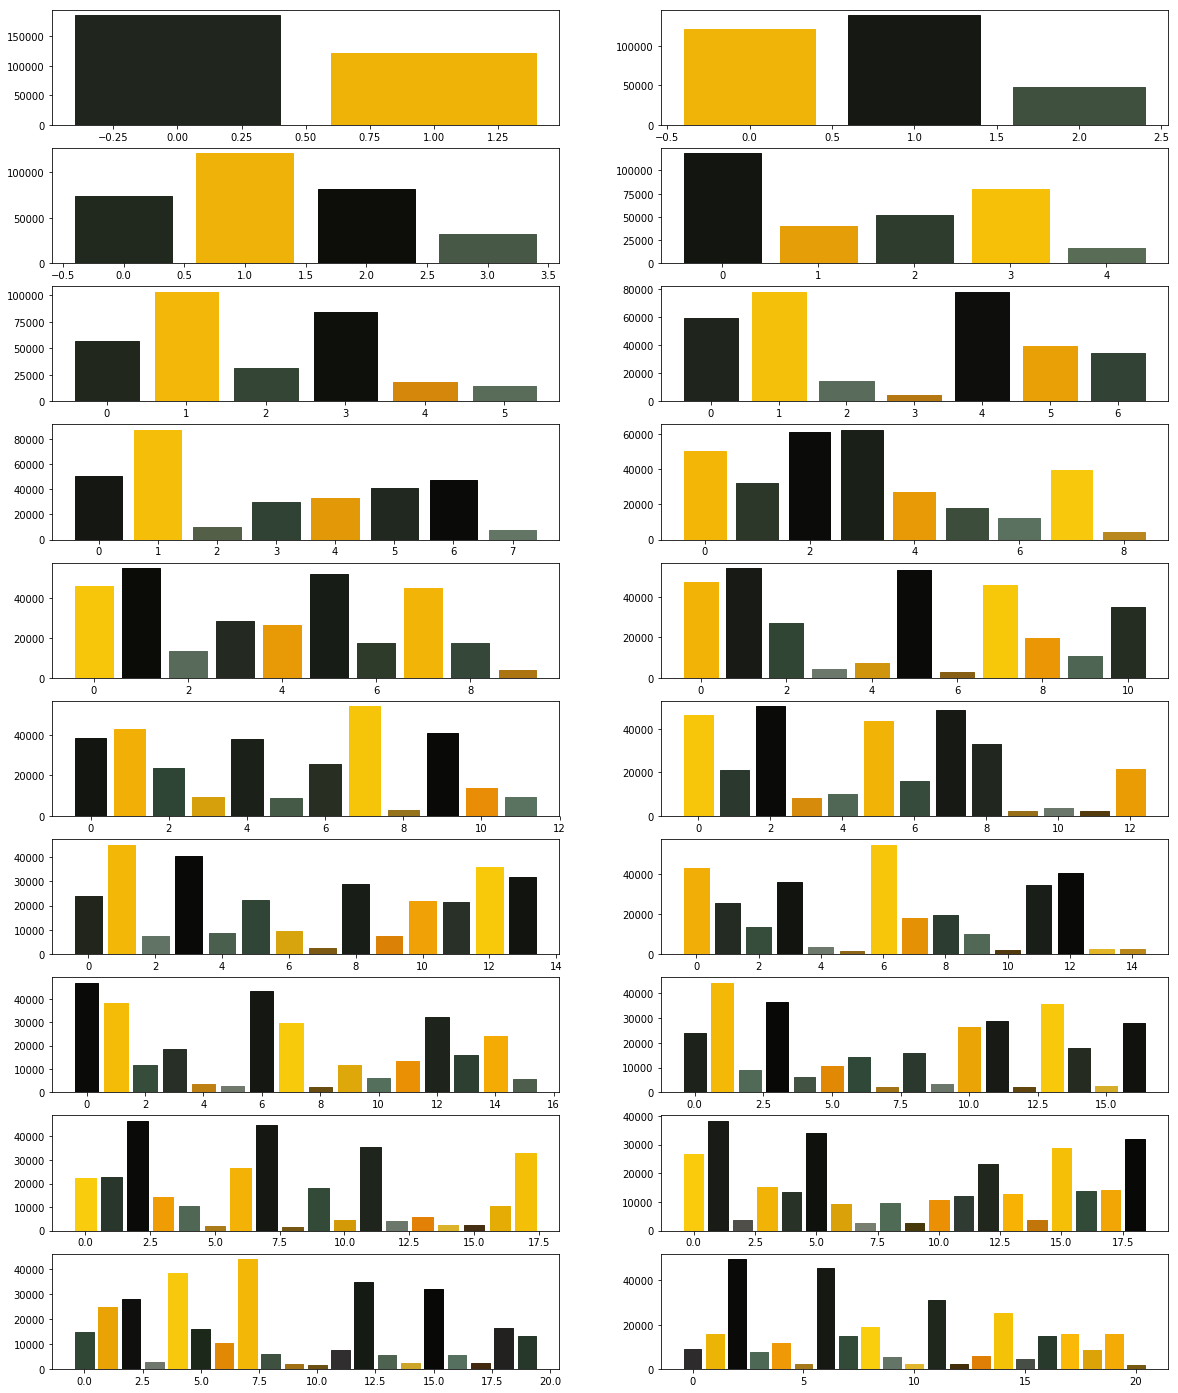

Afin de comparer les deux algorithmes, nous considérons le temps pris par chacun de ces algorithmes. Nous allons répéter l'expérience ci-dessus, mais cette fois nous allons tracer le temps nécessaire pour obtenir des grappes de tailles différentes.

Nous commençons par **KMeans**.


In [ ]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x

    start_time = time.time()
    clusters = KMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

Vous pouvez obtenir un graphique similaire à celui qui suit.

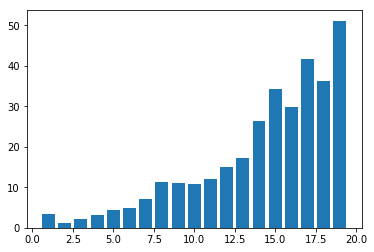

Nous utilisons maintenant **MiniBatchKMeans**.

In [ ]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x

    start_time = time.time()
    clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

Vous pouvez obtenir un graphique similaire à celui qui suit.

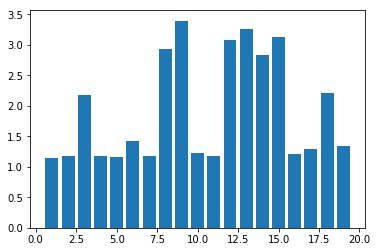

Testez maintenant le code ci-dessus en utilisant l'algorithme **MiniBatchKMeans** avec des tailles de grappes entre 2 et 50. Quelles sont vos observations ?

Enfin, nous voulons voir si nous obtenons les mêmes centres de grappes à partir des deux algorithmes. Lancez le programme suivant pour voir les centres de grappes produits par les deux algorithmes. Nous utilisons deux couleurs différentes (rouge et noir) pour distinguer les centres de grappes des deux algorithmes.


In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

cluster_count = 10

clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)

mclusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
mclusters.fit(numarray)

fig, axes = plot.subplots(nrows=3, ncols=1, figsize=(20, 25))
# Scatter plot for RG (RGB)
axes[0].scatter(numarray[:, 0], numarray[:, 1])
axes[0].scatter(
    clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], c="red"
)
axes[0].scatter(
    mclusters.cluster_centers_[:, 0], mclusters.cluster_centers_[:, 1], c="black"
)

# Scatter plot of RB (RGB)
axes[1].scatter(numarray[:, 0], numarray[:, 2])
axes[1].scatter(
    clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 2], c="red"
)
axes[1].scatter(
    mclusters.cluster_centers_[:, 0], mclusters.cluster_centers_[:, 2], c="black"
)

# Scatter plot of GB (RGB)
axes[2].scatter(numarray[:, 1], numarray[:, 2])
axes[2].scatter(
    clusters.cluster_centers_[:, 1], clusters.cluster_centers_[:, 2], c="red"
)
axes[2].scatter(
    mclusters.cluster_centers_[:, 1], mclusters.cluster_centers_[:, 2], c="black"
)

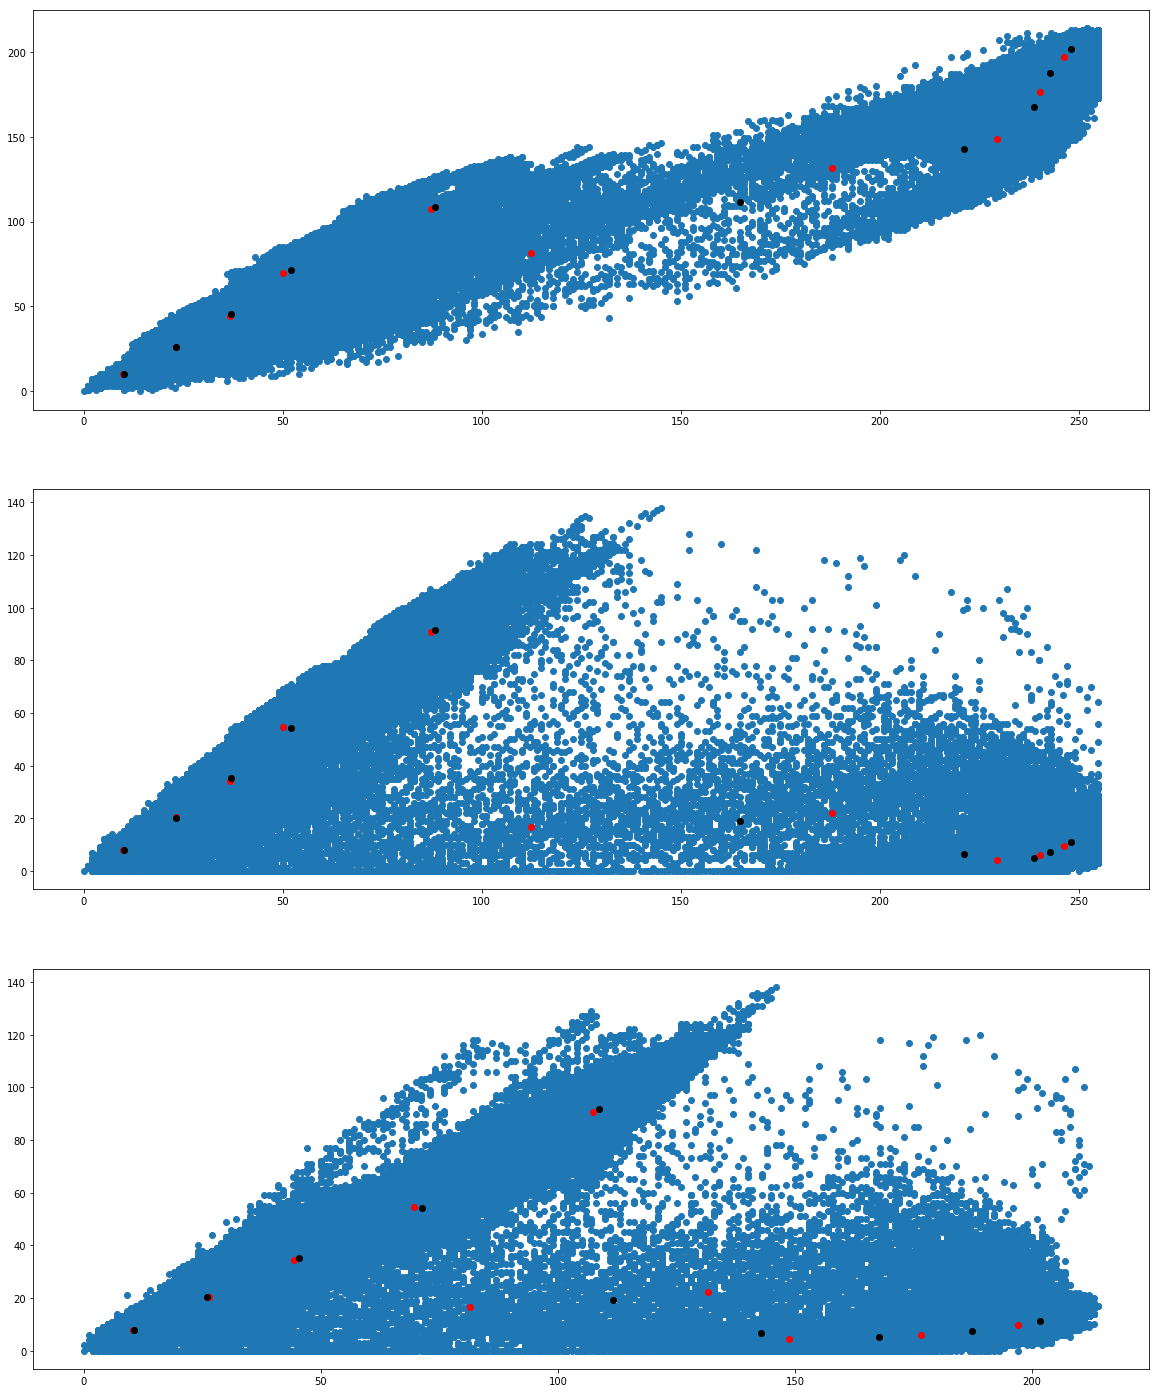

Nous aimerions voir comment les valeurs des pixels individuels ont été regroupées. Exécutez le programme suivant quelques fois.


In [ ]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

cluster_count = 10

mclusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
mclusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(mclusters.labels_, bins=npbins)
labels = numpy.unique(mclusters.labels_)

fig, axes = plot.subplots(nrows=3, ncols=2, figsize=(20, 25))

# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(mclusters.cluster_centers_[j][0]),
            math.ceil(mclusters.cluster_centers_[j][1]),
            0,
        )
    )

axes[0, 0].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 0].scatter(
    mclusters.cluster_centers_[:, 0],
    mclusters.cluster_centers_[:, 1],
    marker="+",
    c="red",
)

# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(mclusters.cluster_centers_[j][0]),
            0,
            math.ceil(mclusters.cluster_centers_[j][2]),
        )
    )

axes[1, 0].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 0].scatter(
    mclusters.cluster_centers_[:, 0],
    mclusters.cluster_centers_[:, 2],
    marker="+",
    c="white",
)

# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            0,
            math.ceil(mclusters.cluster_centers_[j][1]),
            math.ceil(mclusters.cluster_centers_[j][2]),
        )
    )

axes[2, 0].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 0].scatter(
    mclusters.cluster_centers_[:, 1],
    mclusters.cluster_centers_[:, 2],
    marker="+",
    c="yellow",
)

clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)

# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[j][0]),
            math.ceil(clusters.cluster_centers_[j][1]),
            0,
        )
    )

axes[0, 1].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 1].scatter(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    marker="+",
    c="red",
)

# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[j][0]),
            0,
            math.ceil(clusters.cluster_centers_[j][2]),
        )
    )

axes[1, 1].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 1].scatter(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 2],
    marker="+",
    c="white",
)

# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            0,
            math.ceil(clusters.cluster_centers_[j][1]),
            math.ceil(clusters.cluster_centers_[j][2]),
        )
    )

axes[2, 1].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 1].scatter(
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    marker="+",
    c="yellow",
)
plot.show()

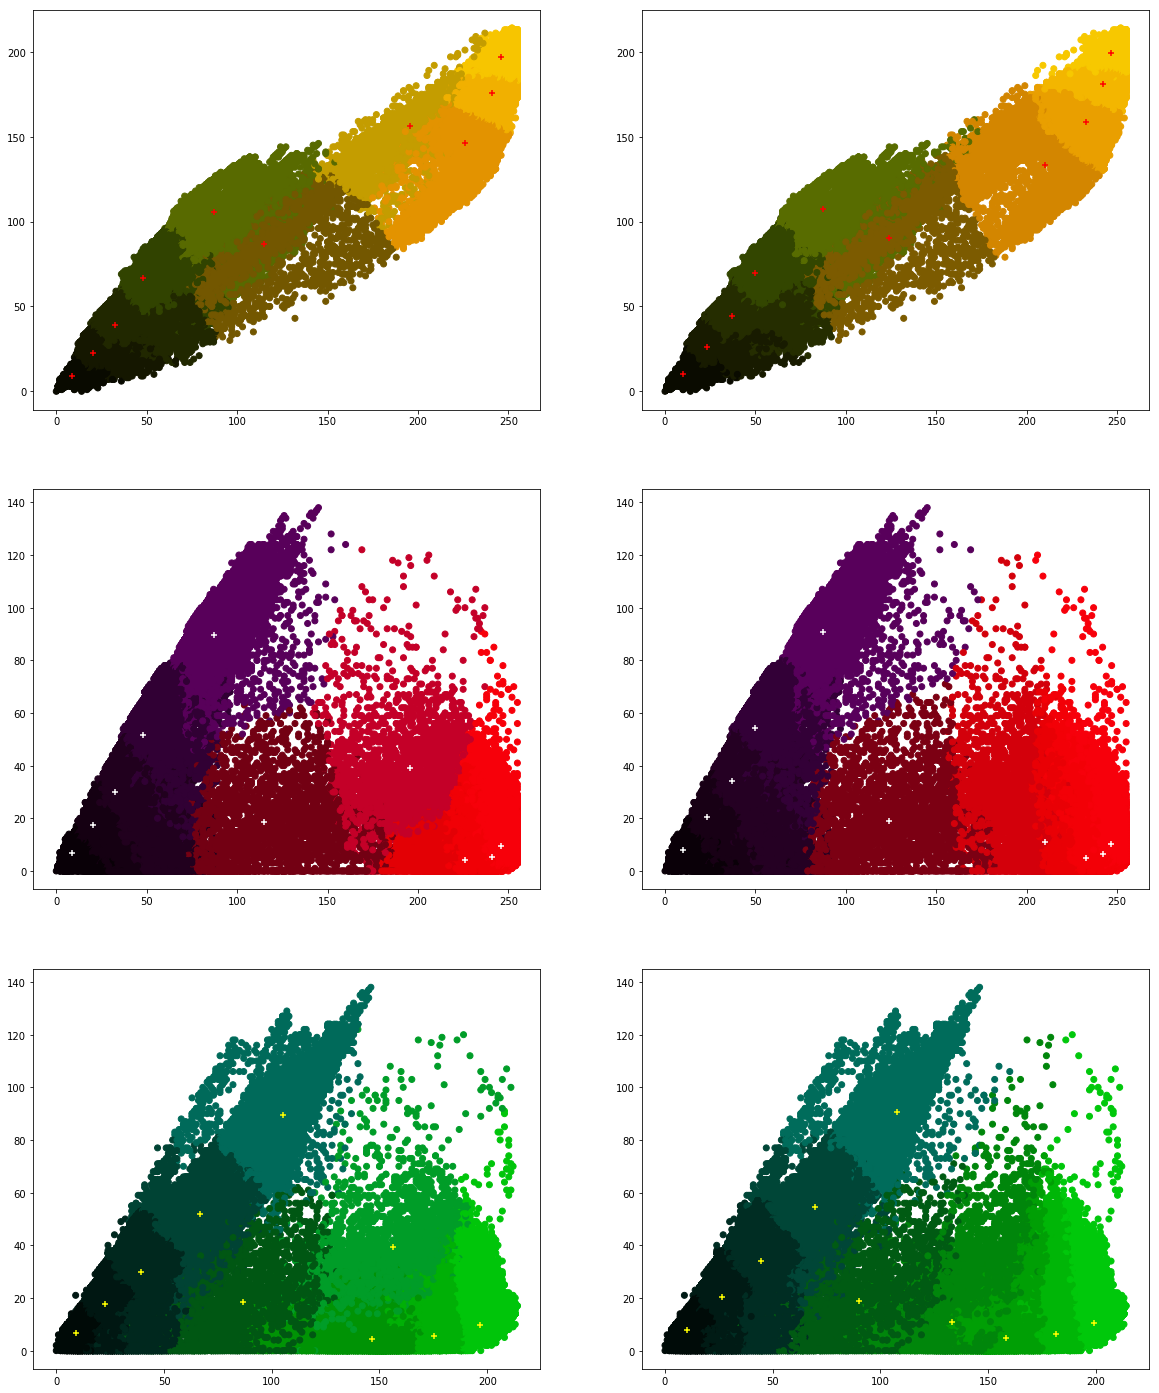

Quelles sont vos conclusions ?



**Question 1**

Dans cette question, vous devez regrouper un ensemble d'images en utilisant KMeans et MiniBatchKMeans et évaluer leur évolutivité.

a. **Regroupement d'images** :
- Utilisez un ensemble de 5 images avec des contenus variés (par exemple, nature, paysages urbains, art abstrait).
- Appliquez MiniBatchKMeans avec différentes valeurs pour `n_clusters` (2, 4, 6, 8) afin d'identifier les couleurs dominantes dans chaque image.

b. **Profilage des performances** :
- Pour chaque image et chaque nombre de clusters, profilez le temps d'exécution et l'utilisation de la mémoire du processus de regroupement en utilisant `time` et `memory_profiler`.
- Créez un graphique à barres comparant le temps d'exécution et l'utilisation de la mémoire pour chaque image avec différents nombres de clusters.

**Astuce** : `memory_profiler` peut être utilisé de la manière suivante.

In [ ]:
!pip install memory_profiler

In [ ]:
%load_ext memory_profiler

import numpy as np

def my_function():
    arr = np.random.rand(1000, 1000)
    return arr

%memit my_function()

## Exercice 5 [★★★]

Enfin, nous traçons ces clusters en 3D. Testez le graphique suivant avec différentes images et différents nombres de clusters.

In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import scale, minmax_scale

cluster_count = 10

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

# Calculer les clusters
clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)


# Calculer le nombre de pixels appartenant à chaque cluster
unique, frequency = numpy.unique(clusters.labels_, return_counts=True)

# Mise à l'échelle de la valeur de la fréquence entre 50 et 2000
# (ces valeurs ont été choisies au hasard)
scaled_frequency = minmax_scale(frequency, feature_range=(50, 2000))

colors = []
for i in range(len(clusters.cluster_centers_)):
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )

# Diagramme de dispersion 3D
plot.figure(figsize=(8, 8))
axes = plot.axes(projection="3d")
axes.scatter3D(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    c=colors,
    s=scaled_frequency,
);

Comparez les deux approches (MiniBatchKMeans et KMeans).

In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import scale, minmax_scale

cluster_count = 10

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

# Calculer les clusters
clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)


# Calculer le nombre de pixels appartenant à chaque cluster
unique, frequency = numpy.unique(clusters.labels_, return_counts=True)

# Mise à l'échelle de la valeur de la fréquence entre 50 et 2000
# (ces valeurs ont été choisies au hasard)
scaled_frequency = minmax_scale(frequency, feature_range=(50, 2000))

colors = []
for i in range(len(clusters.cluster_centers_)):
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )

# Diagramme de dispersion 3D
plot.figure(figsize=(8, 8))
axes = plot.axes(projection="3d")
axes.scatter3D(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    c=colors,
    s=scaled_frequency,
)

### Segmentation d'Image avec l'Algorithme de Clustering KMeans

Ensuite, nous allons effectuer une segmentation d'image en utilisant l'algorithme de clustering KMeans. L'objectif est de segmenter l'image en régions ayant des couleurs similaires, puis de reconstruire l'image en utilisant les couleurs segmentées.

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Charger l'image
imgfile = Image.open("../../images/flower.jpg")
img = np.array(imgfile)

# Redimensionner l'image en un tableau 2D (chaque ligne est un pixel et chaque colonne est un canal de couleur)
pixels = img.reshape(-1, 3)

# Appliquer le clustering KMeans aux pixels de l'image
cluster_count = 4  # Expérimentez avec différentes valeurs (par exemple, 3, 6, 10)
kmeans = KMeans(n_clusters=cluster_count, n_init=10)
kmeans.fit(pixels)

# Obtenir les centres des clusters (valeurs RGB)
cluster_centers = kmeans.cluster_centers_

# Assigner chaque pixel au centre de cluster le plus proche
segmented_img = cluster_centers[kmeans.labels_].reshape(img.shape)

# Reconstruire l'image segmentée avec les centres des clusters
segmented_img = np.clip(segmented_img, 0, 255).astype(np.uint8)

# Convertir l'image segmentée en type entier non signé sur 8 bits pour l'affichage
# Afficher l'image originale et l'image segmentée
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(img)
axes[0].set_title("Image Originale")
axes[0].axis('off')

axes[1].imshow(segmented_img)
axes[1].set_title(f"Image Segmentée avec {cluster_count} clusters")
axes[1].axis('off')

plt.show()


### La méthode du coude pour déterminer le nombre optimal de clusters

**Inertie** : Dans le clustering KMeans, l'inertie (également connue sous le nom de somme des erreurs au carré, SSE) est calculée comme la somme des distances au carré entre chaque point et son centre de cluster (centroïde). L'idée est qu'en minimisant cette inertie, le modèle de clustering trouve des clusters compacts où les points sont plus proches de leurs centroïdes respectifs.

**Méthode du coude** :
   - Lorsque vous tracez l'inertie en fonction du nombre de clusters (`k`), vous constatez généralement que l'inertie diminue à mesure que `k` augmente.
   - Initialement, ajouter plus de clusters réduit considérablement l'inertie, car chaque point est affecté à un cluster plus spécifique.
   - Après un certain point, ajouter plus de clusters entraîne une réduction beaucoup plus lente de l'inertie, et c'est là que le "coude" apparaît.
   - Le "coude" représente le nombre optimal de clusters, car ajouter plus de clusters au-delà de ce point n'entraîne pas d'améliorations substantielles de la qualité du modèle (mesurée par l'inertie).

**Interprétation du graphique** :
   - Sur l'**axe des x**, vous avez le nombre de clusters (`k`).
   - Sur l'**axe des y**, vous tracez l'inertie pour chaque valeur de `k`.

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Charger l'image
imgfile = Image.open("../../images/flower.jpg")
img = np.array(imgfile)

# Redimensionner l'image en un tableau 2D (chaque ligne est un pixel et chaque colonne est un canal de couleur)
pixels = img.reshape(-1, 3)

# Liste pour stocker l'inertie pour différents nombres de clusters
inertia_values = []

# Essayer différentes tailles de clusters de 1 à 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pixels)
    inertia_values.append(kmeans.inertia_)

# Tracer les valeurs d'inertie en fonction du nombre de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Méthode du coude pour déterminer le K optimal')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.grid(True)
plt.show()

Quelle est la valeur optimale du nombre de clusters ?

La **méthode de la silhouette** évalue la qualité du clustering en mesurant dans quelle mesure chaque point de données s'adapte bien à son cluster assigné par rapport aux autres clusters. Elle calcule un **score de silhouette** pour chaque point, défini par :

$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$

où :  
- $a(i)$ est la distance moyenne entre un point et les autres dans son cluster.  
- $b(i)$ est la distance moyenne entre le point et le cluster le plus proche.

Le score varie de **-1 à 1** :  
- **Proche de 1** → Bien regroupé  
- **Autour de 0** → Clusters qui se chevauchent  
- **Inférieur à 0** → Mauvaise classification

Un **score moyen de silhouette** plus élevé pour tous les points indique une meilleure configuration de clustering. Cela aide à déterminer le nombre optimal de clusters **(K)**, en complément de la **méthode du coude**.

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import shuffle

# Charger l'image
imgfile = Image.open("../../images/flower.jpg")
img = np.array(imgfile)

# Redimensionner l'image en un tableau 2D (chaque ligne est un pixel et chaque colonne est un canal de couleur)
pixels = img.reshape(-1, 3)

# Échantillonner un sous-ensemble de pixels (par exemple, 10 000 pixels)
sample_size = min(10000, pixels.shape[0])  # Ajuster la taille de l'échantillon selon les besoins
pixels_sampled = shuffle(pixels, random_state=42)[:sample_size]

# Listes pour stocker les valeurs d'inertie et les scores de silhouette
inertia_values = []
silhouette_scores = []

# Essayer différentes tailles de clusters de 2 à 10 (le score de silhouette n'est pas défini pour k=1)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pixels)
    
    # Stocker l'inertie
    inertia_values.append(kmeans.inertia_)
    
    # Calculer le score de silhouette uniquement sur les pixels échantillonnés  
    score = silhouette_score(pixels_sampled, kmeans.predict(pixels_sampled))

    silhouette_scores.append(score)

# Tracer la méthode du coude (Inertie)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o', label="Inertie")
plt.title('Méthode du coude pour déterminer le K optimal')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.grid(True)

# Tracer les scores de silhouette
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='s', color='red', label="Score de silhouette")
plt.title('Score de silhouette pour différents K')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Score de silhouette')
plt.grid(True)

plt.show()


**Question 1**

### Impact de la mise à l'échelle des caractéristiques sur le clustering

Avant d'appliquer KMeans, mettez à l'échelle les valeurs des pixels de l'image à l'aide d'un standard scaler (par exemple, `StandardScaler` de `sklearn.preprocessing`).
- Comment la mise à l'échelle des caractéristiques (pixels) affecte-t-elle les résultats de la segmentation ?
- Comparez les images segmentées avec et sans mise à l'échelle. Quelles différences observez-vous ?